In [1]:
datapath = "../datafinal"

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [2]:
tissue='Lung'
import pandas as pd
from help.preprocess.loaders import feature_assemble_df
import os
df_lab = pd.read_csv(os.path.join(datapath, f'{tissue}_HELP.csv'), index_col=0).replace({'aE':'NE', 'sNE':'NE'})
print(df_lab.value_counts(normalize=False))
features = [{'fname': os.path.join(datapath, f'{tissue}_BIO.csv'), 'fixna' : False, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_CCcfs.csv'), 'nchunks': 5, 'fixna' : False, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_EmbN2V_128.csv'), 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_lab, features=features, subsample=True, fold=4, seed=1, saveflag=False, verbose=True) 
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

label
NE       16696
E         1235
Name: count, dtype: int64
Majority NE 16696 minoriy E 1235
Subsampling with factor 1:4
[Lung_BIO.csv] found 52507 Nan...
[Lung_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


[Lung_CCcfs.csv] found 6749288 Nan...
[Lung_CCcfs.csv] Normalization with std ...
[Lung_EmbN2V_128.csv] found 0 Nan...
[Lung_EmbN2V_128.csv] No normalization...
5961 labeled genes over a total of 6175
(5961, 3455) data input


,Transcript count,GC content,GTEX_lung,Gene_Disease association,OncoDB_expression,HPA_lung,GO-MF,GO-BP,GO-CC,BIOGRID,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A1CF,0.047120,0.160530,6.512609e-07,NaN,0.520008,0.000000,0.069767,0.041026,0.096154,0.009589,...,0.673553,1.394478,0.040143,0.391288,-0.520452,0.065344,0.055139,0.501500,-0.632607,NE
AAAS,0.109948,0.389984,1.918293e-03,0.00590,0.555280,0.000569,0.000000,0.035897,0.173077,0.039282,...,0.444953,0.647637,-1.125009,0.725848,-0.258197,0.137277,-0.138943,-0.305531,-0.675355,NE
AADAC,0.005236,0.144128,6.803914e-05,0.00000,0.315374,0.000489,0.139535,0.010256,0.019231,0.000000,...,-0.150236,0.843932,0.961256,0.531136,-0.143357,0.196230,0.364191,-0.149429,1.179155,NE
AAGAB,0.031414,0.216891,9.835758e-04,0.00885,0.559248,0.000843,0.000000,0.000000,0.038462,0.009589,...,-0.615926,0.377720,0.149085,-0.859837,-0.266278,0.297994,-0.230786,-0.205945,0.256425,NE
AAMP,0.047120,0.512825,4.296572e-03,NaN,0.551172,0.002406,0.023256,0.015385,0.076923,0.015466,...,0.078412,-0.648590,-0.305723,0.155255,-0.351834,-0.515158,0.099858,0.343565,1.313062,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN9,0.041885,0.285640,4.147889e-04,NaN,0.536883,0.000515,0.116279,0.000000,0.000000,0.005258,...,-0.210170,-0.247461,-0.323998,-0.131499,0.629386,0.134844,-0.526587,-0.399399,0.102545,NE
ZSWIM6,0.000000,0.194381,1.020100e-03,0.00885,NaN,0.000354,0.000000,0.005128,0.000000,0.002474,...,-0.544772,0.096830,-0.437809,0.332207,0.642001,-0.044368,0.400263,-0.340242,0.570867,NE
ZXDC,0.015707,0.377247,8.498152e-04,NaN,0.541949,0.000381,0.116279,0.020513,0.000000,0.007733,...,0.054680,-0.111482,0.971618,-0.407562,0.652605,0.450670,0.190476,-0.894413,0.287124,NE
ZYG11B,0.005236,0.248648,4.800479e-04,NaN,0.491584,0.000413,0.000000,0.005128,0.000000,0.027838,...,-0.531551,-0.327476,-0.333261,-0.137215,0.157442,-0.298281,0.299088,0.416887,-0.110293,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then storing predictions and printing metrics.

{'E': 0, 'NE': 1}
label
NE       4737
E        1224
Name: count, dtype: int64
Classification with LightGBM...


5-fold: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


,measure
ROC-AUC,0.9580±0.0057
Accuracy,0.9133±0.0066
BA,0.8673±0.0074
Sensitivity,0.7892±0.0164
Specificity,0.9453±0.0093
MCC,0.7347±0.0172
CM,"[[966, 258], [259, 4478]]"


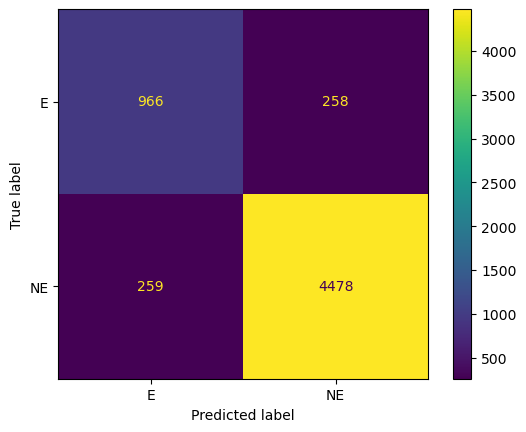

In [3]:
from help.models.prediction import predict_cv
df_scores_means, df_scores, preds = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, saveflag=True, verbose=True
                                        #outfile=os.path.join(datapath,f'pred_{tissue}_nospl.csv')
                                        )
df_scores_means

# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Majority NE 16696 minoriy E 1235
Subsampling with factor 1:4
[Lung_BIO.csv] found 52507 Nan...
[Lung_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


[Lung_CCcfs.csv] found 6749288 Nan...
[Lung_CCcfs.csv] Normalization with std ...
[Lung_EmbN2V_128.csv] found 0 Nan...
[Lung_EmbN2V_128.csv] No normalization...
5965 labeled genes over a total of 6175
(5965, 3455) data input


ValueError: too many values to unpack (expected 2)

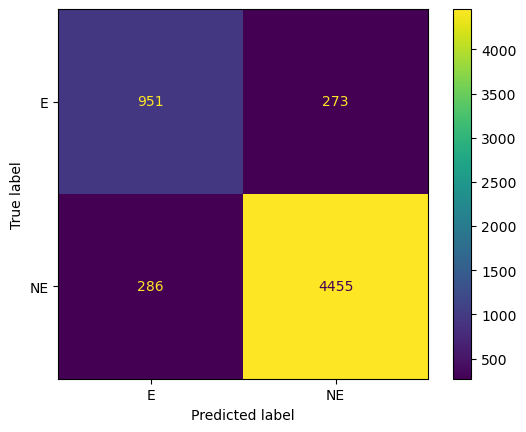

In [6]:
from help.preprocess.loaders import feature_assemble_df
df_X, df_y = feature_assemble_df(df_lab, features=features, subsample=True, fold=4, seed=1, verbose=True)
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means